\tableofcontents  
\pagebreak  

# Machine Learning in Python

Im vorherigen Teil haben wir uns mit wissenschaftlichen Berechnungen und Visualisierungen beschäftigt, als auch einen kurzen Einblick in die digitale Singalverarbeitung erhalten. In diesem Teil soll es um Machine Learning gehen. Mit Machine Learning sind hier die alle statistischen Verfahren gemeint, mit deren Hilfe man aus vorhandenen Daten Rückschlüsse zu ähnlichen Vorgängen ziehen kann. Formal lässt sich Machine Learning so definieren[<sup id="fn1-back">[1]</sup>](#fn1):

> ,,`A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.`"

In diesem Tutorial soll es nur um die klassischen Verfahren gehen, welche ohne neuronale Netze ausgekommen. Neuronale Netzte und Deep Learning werden in einem anderen Tutorial vorgestellt. Nur so viel: Deep Learning zählt zu Machine Learning, hat aber eine andere Herangehensweise, welche mehr auf Heuristik statt exakte Beweise setzt.

## Einteilung von Machine Learning

Machine Learning lässt sich grob in drei Kategorien einteilen:

* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

Worum es bei jeder Kategorie geht werden wir nun eingehender beleuchten.

![Test](ML_diagram.png)

### Supervised Learning

Supervised Learning ist der simpelste Fall: Wir haben einen Datensatz ("dataset") welcher zu jedem Datenpunkt die Eigenschaften ("features") und das Ziel ("label" oder "target") enthält. Entscheidend ist hier das vorhandensein des Ziels: Wenn wir unseren Algorithmus trainieren können wir ihm vorgeben was er genau lernen soll, ihn also dabei überwachen.

Man unterscheidet dann nochmal zwischen Klassifikation und Regression: Bei Klassifikation ist unser Ziel eine diskrete Variable, beispielsweise die natürlichen Zahlen 1 bis 9 oder ob jemand Brustkrebs hat oder nicht. Wir wollen dann eine Wahrscheinlichkeit ermitteln, dass ein Datenpunkt zu einer der Klassen gehört. Bei der Regression ist unser Ziel eine kontinuierliche Variable, wie beispielsweise der Preis eines Hauses oder der Wert einer Aktie. Dann wollen wir einen numerischen Wert ermitteln.

### Unsupervised Learning

Unsupervised Learning unterscheidet sich von Supervised Learning, als dass wir keine konkrete Variable haben, auf die wir unseren Algorithmus trainieren. Stattdessen suchen wir nach Strukturen in unseren Daten, welche in (einer für uns unbekannten) Beziehung zu den Daten stehen.

Dazu zählt beispielsweise das Clustering, bei welchem man nach Gruppen ("clustern") innerhalb der Daten sucht. Ein Beispiel dafür wäre das Einteilen von Webseitenbesuchern in verschiedene Gruppen, um Werbung auf die Mitglieder der jeweiligen Gruppe zuzuschneiden.

Ebenfalls gehört zum Unsupervised Learning die Anomaly oder Outlier Erkennung. Hierbei geht man davon aus, dass der Großteil der Daten einem Muster folgt, sich also normal verhält. Man will nun die Elemente ermitteln, welche diesem Muster nicht folgen, also Außenseiter sind. Beispielsweise könnte eine Bank durch Anomaly Erkennung versuchen, legitime Überweisungen von betrügerischen zu unterscheiden und so ihre Kunden vor Diebstahl schützen.

Zu guter letzt sei noch die Dimensionsreduzierung zu nennen. Liegen zu unseren Daten sehr viele Eigenschaften vor, von denen viele aber nur wenig aussagekräftig sind, können wir über Dimensionsreduzierung unsere Daten auf die nötigsten Eigenschaften reduzieren, ohne dabei substantiell an Aussagekraft zu verlieren. Wir komprimieren unsere Daten also, was eines der Anwendungsgebiete darstellt.

### Reinforcement Learning

Reinforcement Learning ist im Gegensatz zu Supervised und Unsupervised Learning kein klassisches Lernen anhand von statischer Daten, sondern Lernen auf Grund von Feedback einer (dynamischen) Umgebung. Ein Agent wird dabei in eine simulierte Umgebung gesetzt und kann dort Aktionen ausführen, welche wiederum die Umgebung beeinflussen. Ziel des Agenten ist es nun, Belohnungen ("rewards") zu sammeln und Bestrafungen ("punishments") zu vermeiden. Auf Grund des Feedbacks der Umgebung lernt der Agent so, welche Aktionen er wann ausführen sollte. Ein Beispiel für Reinforcement Learning sind selbstfahrende Autos oder autonome mobile Roboter, aber auch das Spielen eines Videospiels fällt unter diese Kategorie.

Im Gegensatz zu den anderen beiden Kategorien ist Reinforcement Learning auf Grund seiner Dynamik deutlich komplexer und wird heutzutage meist mit neuronalen Netzen gelöst. Wir werden in diesem Tutorial nicht weiter auf Reinforcement Learning eingehen.

## Pakete

Wir werden in den folgenden Abschnitten die Pakete

* [NumPy](https://numpy.org),
* [matplotlib](https://matplotlib.org),
* [pandas](https://pandas.pydata.org) und
* [scikit-learn](https://scikit-learn.org)

verwenden, welche wir deshalb zu nächst importieren. NumPy, pandas und matplotlib werden via alias importiert.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

Auf die letzen beiden Pakete werden wir im Laufe dieses Notebooks eingehen.

# Ein erstes Beispiel Projekt: das Iris Dataset

Wir wollen uns zur Einführung ein Beispiel zur Klassifikation anschauen. Wir erinnern uns: Klassifikation ist das Einteilen in verschiedene, diskrete Klassen oder Kategorien.

Das Dataset, dass wir uns zur Einführung ansehen werden, ist das Iris Dataset. Es enthält zu 3 Pflanzen je 50 Samples, also insgesamt 150 Samples. Zu jedem Sample liegen 4 Features vor:

- Breite des Blüttenblatts (,,petal width (cm)"),
- Länge des Blütenblatts (,,petal length (cm)"),
- Breite des Kelchblatts (,,sepal width (cm)") und
- Länge des Kelchblatts (,,sepal length (cm)").

Das Target ist eine Zahl für eine der drei Pflanzen:

- Iris Setosa (0),
- Iris Versicolor (1) und
- Iris Virginica (2).

Jedes Data Science Projekt beginnt erstmal damit, dass man sich mit dem Datensatz vertraut macht. Dafür müssen wir die Daten natürlich auch einlesen. In diesem konkreten Fall liegen die Daten in Form einer CSV Datei vor, die sich im selben Verzeichnis befindet wie dieses Notebook. Deshalb müssen wir als Dateipfad nur den Namen der Datei inklusive Dateiendung angeben. Unsere Datei trägt den Namen `iris.csv`.

In [2]:
file_path = "iris.csv"

Wir könnten jetzt die Datei mit NumPy einlesen, allerdings ist NumPy primär für die Verarbeitung von numerischen Werten geeignet, welche noch dazu alle den selben Datentyp haben müssen. Unsere Datei enthält aber gemischte Datentypen, weshalb hier der Einsatz von `pandas` Sinn ergibt.

## Einführung in `pandas`

`pandas` ist eine Python Bibliothek für die Analyse und Verwaltung von strukturierten Daten. Strukturierte Daten sind geordnete, sortierte und zusammengefasste Daten. Wir müssen uns also nicht aus verschiedenen Quellen unsere Daten zusammensuchen und diese in einer Tabelle zusammenführen, da dieser Schritt bereits erledigt wurde.

`pandas` unterscheidet grob zwischen zwei Arten von strukturierten Daten: 1D-Daten, also Vektoren, welche mit `Series` verwaltet werden, und 2D-Daten, also Matrizen, welche mit `DataFrames` verwaltet werden. Hierbei stellen die Zeilen die Samples dar und die Spalten die Features, im Falle einer `Series` eben nur ein Feature. Jedes `DataFrame` setzt sich aus mehreren `Series` zusammen. Die Einträge einer `Series` müssen alle den selben Datentyp haben, jedoch können unterschiedliche `Series` auch unterschiedliche Datentypen haben. Der Vorteil eines `DataFrames` gegenüber einem `NumPy` Array besteht also in dem vermischen verschiedener Datentypen innerhalb eines `DataFrames`.

### Daten einlesen

Zum Einlesen von CSV Dateien stellt `pandas` die Funktion `read_csv` zur Verfügung. Dazu übergeben wir der Funktion den Dateipfad, an dem sich die Datei befindet, und `pandas` erzeugt ein `DataFrame` mit den entsprechenden Einträgen.

In [3]:
iris_df = pd.read_csv(file_path)

### Überblick verschaffen

Schauen wir uns doch zunächst einmal die Einträge unseres `DataFrames` an. Wir geben dazu einfach den Variablennamen des `DataFrames` ein und uns werden dann 5 Einträge vom Anfang und Ende angezeigt.

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Mit der Funktion `info` erhalten wir eine komprimierte Übersicht über unseren Datensatz, bei dem Datentypen, Anzahl pro Spalte und Speicherbedarf angegeben werden.

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Mit der Funktion `head` erhalten wir nur den ,,Kopf" des `DataFrames`.

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Wie wir sehen enthält unser Datensatz 150 Einträge mit 5 Spalten. Die ersten 4 Spalten sind unsere Features, die 5. Spalte ist unser Ziel. Mit nur wenigen Befehlen haben wir mit Hilfe von `pandas` also einen groben Überblick über unseren Datensatz erhalten.Mit nur wenigen Befehlen haben wir mit Hilfe von `pandas` also einen groben Überblick über unseren Datensatz erhalten.

### Abrufen von Elementen

Im Gegensatz zu `NumPy`, bei welchem lediglich numerische Indizes verwendet werden, erlaubt `pandas` auch die Verwendung von Strings als Indizes. Wollen wir beispielsweise die erste Spalte abrufen, können wir dazu auch ,,sepal length (cm)" verwenden.

In [7]:
iris_df["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

Wollen wir dann ein konkretes Element aus dieser Spalte auswählen können wir dann in separaten eckigen Klammern die Zeile angeben, aus welcher wir das betreffende Element haben wollen. Wollen wir also aus der ersten Spalte das dritte Element haben sieht unser Befehl so aus:

In [8]:
iris_df["sepal length (cm)"][2]

4.7

Die Indizierung passiert hier analog zu der von Dictionaries: unser erster Index ist ein String, der zweite dann eine Zahl. Wir können aber auch die klassische `NumPy` Indizierung verwenden. Hierzu nutzt man das Attribut `iloc` (,,integer-based location"). Dann werden die Indizes alle in eine eckige Klammer hinter `iloc` geschrieben und durch ein Komma getrennt. Wollen wir beispielsweise alle Elemente der ersten 3 Spalten abrufen verwenden wir den folgenden Befehl:

In [9]:
iris_df.iloc[:, 0:3]

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


Genau wie `NumPy` ist der letzte Index exklusive, die Elemente an dieser Stelle werden also nicht abgerufen.

### Statistische Kennzahlen

 Mit der Funktion `describe` erhalten wir die wichtigsten statistischen Kennwerte unseres Datensatzes, wie Mittelwert, Standardabweichung und auch Perzentile.

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Die größte Auffälligkeit ist wohl die Standardabweichung der ,,petal length (cm)". Mit $\approx$ 1,76 liegt sie deutlich über den Standardabweichungen der anderen Features, was ohne weiteren Kontext aber nur bedingt aussagekräftig ist. Schauen wir uns deshalb zunächst einmal an, welcher Wert mit welchem korreliert, also in (welcher Art auch immer) in Verbindung steht. Mit der Funktion `corr` können wir uns die Korrelationsmatrix anzeigen lassen. Diese gibt an, welcher Wert mit welchem korreliert.

In [11]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Allerdings interessiert uns meistens nicht, ob Features miteinander korrelieren, sondern ob Features mit dem Target korrelieren. Dazu wählen wir dann einfach aus der Korrelationsmatrix den Eintrag ,,target".

In [12]:
iris_df.corr()["target"]

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

Dies ist dann schon aussagekräftiger: es scheint als ob die Größe der Blüttenblätter mit der Spezies korreliert. Allerdings sind Listen von Zahlen meist wenig anschaulich, und mit der Funktion `plotting.scatter_matrix` können wir uns einen Scatter Plot anzeigen lassen, der die Korrelation zwischen den einzelnen Spalten graphisch aufbereitet.

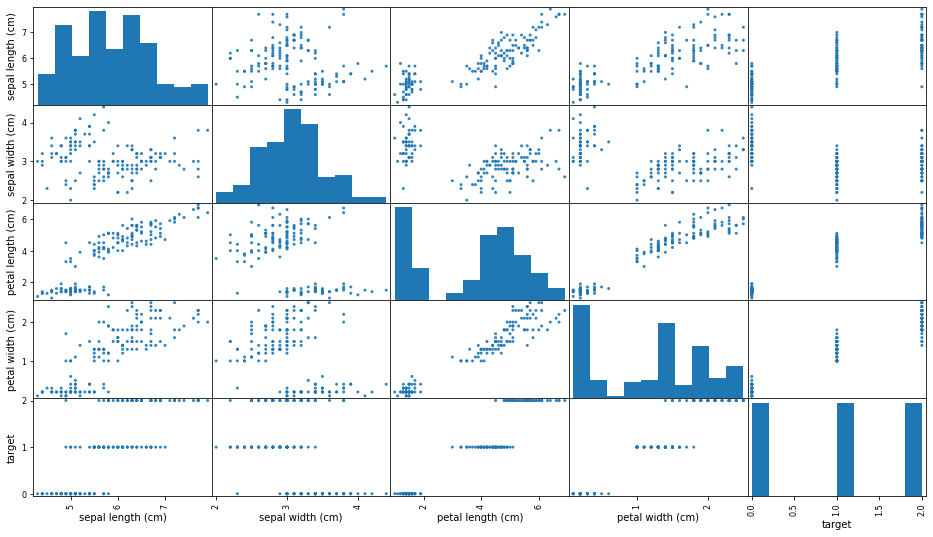

In [15]:
pd.plotting.scatter_matrix(frame=iris_df, figsize=(16, 9), alpha=0.9, grid=True);

Die Darstellung ist etwas schwierig zu lesen, aber auch graphisch können wir sehen, dass die Größe der Blütenblätter (,,petal length (cm)" und ,,petal width (cm)") mit der Spezies korreliert.

### Zusammenfasung

Wir wissen jetzt schon einiges über unseren Dataset:

- Er enthält 150 Samples mit je 4 Features
- Features und Target sind numerische Werte
- Bei der ,,petal length (cm)" besteht die größte Standardabweichung
- Die Größe des Blüttenblatts korreliert am stärksten mit dem Target

Mit diesen Informationen im Hinterkopf können wir uns nun daran machen, ein Modell aufzubauen. Dazu nutzen wir `scikit-learn`.

## Einführung in `scikit-learn`

`scikit-learn` ist eine Python Bibliothek für Machine Learning. Sie enthält Algorithmen, Werkzeuge und (Test-)Datensätze um Machine Learning Models zu erstellen, trainieren und optimieren. Sie enthält vorallem klassische Algorithmen, wie beispielsweise Lineare Regression, Support Vector Machines oder K-Means Clustering. Es gibt zwar auch ein Modul für neuronale Netze, auf Grund der fehlenden GPU Unterstützung ist dies jedoch nicht zu empfehlen.

### Split des Datasets

Wir haben unser Dataset bisher immer nur im Ganzen betrachtet. Allerdings brauchen wir später auch ein Dataset mit dem wir unser Model validieren können. Würden wir nun das Dataset nehmen, mit dem wir unser Model trainiert haben, wäre unser Ergebnis verzerrt, da das Model sich ja bereits auf diesen Datensatz eingestellt hat. Wir müssen also unseren ganzes Dataset in mindestens 2 Teile auftrennen, ein Trainingsdataset und ein Testdataset.

\pagebreak

# Literaturverzeichnis

[<sup id="fn1">[1]</sup>](#fn1-back) *Mitchell, Tom M.*: Machine Learning, New York: McGraw-Hill, 1997, S. 2